npy file loaded
build SegNet started
build SegNet finished: 16s
build batch finished: 17s
train size:  367   test size:  233
running the train loop
INFO:tensorflow:Restoring parameters from ./CAMVIDModels/model.ckpt-105


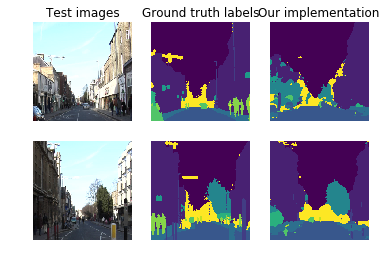

In [1]:
import tensorflow as tf
import numpy as np
import time
import os
import sys

import SegNet as sn
import utils
import batch
import SegNetFlags


#Reset
tf.reset_default_graph()
### DEFINING THE FLAGS ###
FLAGS = tf.app.flags.FLAGS

### DEFINING THE PLACEHOLDERS ###
images_ph = tf.placeholder(tf.float32, [None, FLAGS.inputImX, FLAGS.inputImY, 3])
labels_ph= tf.placeholder(tf.int32, [None, FLAGS.inputImX, FLAGS.inputImY])
phase_ph = tf.placeholder(tf.bool, name='phase')

### BUILDING THE NETWORK ###
segnet = sn.SegNet(im_rgb = images_ph, phase=phase_ph)

### LOAD DATASET ###
batch = batch.batch()

saver = tf.train.Saver()
print("running the train loop")
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.75)))) as sess:
   
    segnet.load_model(saver, sess)

    #Take some images from the training set and show them
    n_images=2
    im_visual, label_visual = batch.get_visualization_images(nImages=n_images,datasetType="TRAIN")
    fetches_visualization = [segnet.argmax_layer]
    feed_dict = {images_ph: im_visual, labels_ph: label_visual, phase_ph: 0}
    im_result = sess.run(fetches_visualization, feed_dict=feed_dict)
    im_result_arr=np.array(im_result).squeeze()

    utils.show_comparison(n_images=n_images,original=im_visual,groundtruth=label_visual,result=im_result_arr)

    

INFO:tensorflow:Restoring parameters from ./CAMVIDModels/model.ckpt-105


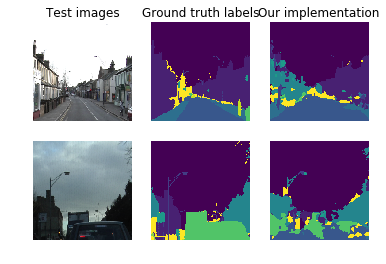

In [3]:
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.75)))) as sess:

    segnet.load_model(saver, sess)
    #Test training set
    n_images=2
    im_visual, label_visual = batch.get_visualization_images(nImages=n_images,datasetType="TEST")
    fetches_visualization = [segnet.argmax_layer]
    feed_dict = {images_ph: im_visual, labels_ph: label_visual, phase_ph: 0}
    im_result = sess.run(fetches_visualization, feed_dict=feed_dict)
    im_result_arr=np.array(im_result).squeeze()

    utils.show_comparison(n_images=n_images,original=im_visual,groundtruth=label_visual,result=im_result_arr)


INFO:tensorflow:Restoring parameters from ./CAMVIDModels/model.ckpt-105


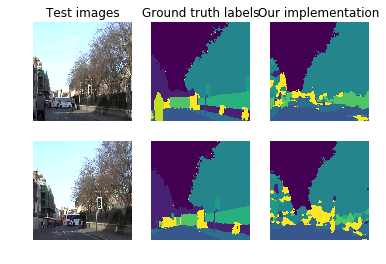

In [4]:
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.75)))) as sess:

    segnet.load_model(saver, sess)
    #Validation set
    batch.get_validation()
    n_images=2
    im_visual, label_visual = batch.get_visualization_images(nImages=n_images,datasetType="VALIDATION")
    fetches_visualization = [segnet.argmax_layer]
    feed_dict = {images_ph: im_visual, labels_ph: label_visual, phase_ph: 0}
    im_result = sess.run(fetches_visualization, feed_dict=feed_dict)
    im_result_arr=np.array(im_result).squeeze()

    utils.show_comparison(n_images=n_images,original=im_visual,groundtruth=label_visual,result=im_result_arr)